<a href="https://colab.research.google.com/github/amityu/BIgData/blob/main/hw1_yuval_amit_032191025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /root/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f database.sqlite -p ./datasets/us-baby-name/database.sqlite
#os.chdir('./datasets/us-baby-name/database.sqlite/')
!unzip ./datasets/us-baby-name/database.sqlite/*.zip  -d ./datasets/us-baby-name/database.sqlite

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open ./datasets/us-baby-name/database.sqlite/*.zip, ./datasets/us-baby-name/database.sqlite/*.zip.zip or ./datasets/us-baby-name/database.sqlite/*.zip.ZIP.

No zipfiles found.


In [ ]:
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import os

import numpy as np
%matplotlib inline
#my_path = 'drive/MyDrive/BigData/'
my_path = "./datasets/us-baby-name/"
#my_path = ""
conn = sqlite3.connect('database.sqlite')#connecting to the database
c = conn.cursor()

c.execute('''CREATE TABLE IF NOT EXISTS Names AS
    SELECT NationalNames.Id, State, NationalNames.Gender, NationalNames.Name, StateNames.Count, NationalNames.Year
    FROM NationalNames  JOIN StateNames ON (NationalNames.Id = StateNames.Id) ;''')
print(c.fetchmany(10))

[]


In [ ]:
os.getcwd()


'/content/drive/My Drive/BigData/datasets/us-baby-name/database.sqlite/datasets/us-baby-name/database.sqlite'

**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [ ]:
from timeit import  timeit

def query():
    c.execute("SELECT * FROM Names WHERE Name = 'Mary'")
    print (c.fetchall())
print (' Time for enqirey %f' %timeit(query, number=1))


[(1, 'AK', 'F', 'Mary', 14, 1880), (1274, 'AK', 'M', 'Mary', 38, 1880), (2001, 'AK', 'F', 'Mary', 8, 1881), (3239, 'AK', 'M', 'Mary', 10, 1881), (3936, 'AK', 'F', 'Mary', 21, 1882), (5278, 'AK', 'M', 'Mary', 35, 1882), (6063, 'AK', 'F', 'Mary', 6, 1883), (7408, 'AK', 'M', 'Mary', 19, 1883), (8147, 'AK', 'F', 'Mary', 9, 1884), (9611, 'AK', 'M', 'Mary', 16, 1884), (10444, 'AK', 'F', 'Mary', 9, 1885), (11911, 'AK', 'M', 'Mary', 6, 1885), (12738, 'AK', 'F', 'Mary', 8, 1886), (14324, 'AK', 'M', 'Mary', 11, 1886), (15130, 'AK', 'F', 'Mary', 11, 1887), (16672, 'AK', 'M', 'Mary', 29, 1887), (17503, 'AK', 'F', 'Mary', 11, 1888), (19224, 'AK', 'M', 'Mary', 43, 1888), (20154, 'AK', 'F', 'Mary', 28, 1889), (21894, 'AK', 'M', 'Mary', 43, 1889), (22744, 'AK', 'F', 'Mary', 12, 1890), (24570, 'AK', 'M', 'Mary', 16, 1890), (25439, 'AK', 'F', 'Mary', 32, 1891), (27230, 'AL', 'M', 'Mary', 12, 1891), (28099, 'AL', 'F', 'Mary', 8, 1892), (30010, 'AL', 'M', 'Mary', 25, 1892), (31020, 'AL', 'F', 'Mary', 77, 

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "032191025"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 2


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in TX in 1986 (10pt)



***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1988 and 1995  (10pt)

In [ ]:
def female_between_years(start, finish):
    c.execute(''' SELECT
        SUM (Count)
        FROM Names
        WHERE Gender = 'F'  AND Year BETWEEN %d AND %d
        '''
        %(start,finish))
    return  c.fetchall()
print(female_between_years(1988, 1995))

[(6184943,)]


**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

**Question 4:** Write a function that returns how many male babies named _Robert where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 2010 (10pt)

**Question (for everyone):** For the state of CA write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

SECOND MOST POPULAR NAME OF A GENDER IN CA IN A DECADE


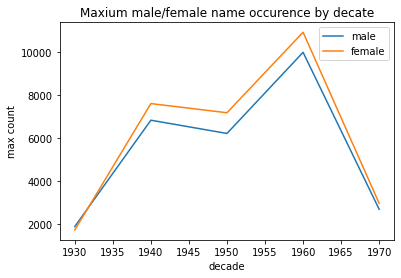

[('Valene', 'F', 1930, 1732), ('Brady', 'M', 1930, 1890), ('Ola', 'F', 1940, 7612), ('Sharon', 'M', 1940, 6839), ('Michele', 'F', 1950, 7186), ('Therman', 'M', 1950, 6222), ('Rayma', 'F', 1960, 10933), ('Kennan', 'M', 1960, 9998), ('Lerae', 'F', 1970, 2971), ('Wendel', 'M', 1970, 2692)]


In [ ]:
import numpy as np
querystr ='''


    DROP table if exists  name_count_query;

    CREATE TABLE  if not exists name_count_query AS
            SELECT Id,Name, Gender, (Year/10)*10 AS decade , SUM (Count) AS name_count
                 FROM Names
                 WHERE State = 'CA'

                 GROUP BY Gender, Name, decade;



    DROP table if exists  max_decade_values;

    CREATE TABLE if not exists  max_decade_values AS
    SELECT *, MAX(name_count) FROM name_count_query GROUP BY decade,Gender;

    CREATE TABLE if not exists  second_max_ca AS
    SELECT *, MAX(name_count) FROM (SELECT  *
    FROM name_count_query
    WHERE id not in (select id from max_decade_values)
    )
    GROUP BY decade,Gender;

        '''
c = conn.cursor()
c.executescript(querystr)
print('SECOND MOST POPULAR NAME OF A GENDER IN CA IN A DECADE')
c.execute('''SELECT name, Gender, decade, name_count  FROM second_max_ca''')

result = c.fetchall()

result_np = np.array(result)
male_map = result_np[:,1] == 'M'
male_results = result_np[male_map,:]
female_results=result_np[~male_map,:]
columnIndex = 2
# Sort 2D numpy array by 2nd Column
male_results = male_results[male_results[:,columnIndex].argsort()]
female_results = female_results[female_results[:,columnIndex].argsort()]
plt.plot((male_results[:,2]).astype(int),(male_results[:,3].astype(int)), label = 'male')
plt.plot((female_results[:,2]).astype(int),(female_results[:,3].astype(int)), label = 'female')
plt.title('Maxium male/female name occurence by decate')
plt.xlabel('decade')
plt.ylabel('max count')
plt.legend()
plt.show()

print (result)

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

In [ ]:
import pandas as pd
import sqlalchemy
# load the data into a Pandas DataFrame
coco_df = pd.read_csv(my_path + 'flavors_of_cacao.csv')
for col in coco_df.columns:
    print(col)

type = {'Company' : 'TEXT',
        'Specific Bean Origin' : 'TEXT',
        'REF': 'INTEGER',
        'Review': 'INTEGER',
        'CocoaPercen': 'REAL',
        'Location':'TEXT',
        'Rating':'REAL',
        'Type':'TEXT',
        'Broad':'TEXT'}
# write the data to a sqlite table
coco_df.to_sql('coco', conn,dtype=type, if_exists='replace', index = False)
#con.commit()

Company
Specific Bean Origin
REF
Review
CocoaPercent
Location
Rating
Type
Broad


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

In [ ]:

c = conn.cursor()
def max_and_average_percent(data = ['A. Morin', 'France']):
    c.execute('''Create  table if not exists mydata(
            company_name TEXT,
            company_location TEXT
            )''')
    c.execute('''INSERT INTO mydata
                 (company_name, company_location)
             VALUES
                  (?, ?);''', data)
    c.execute('''select avg(CocoaPercent), max(CocoaPercent)
        From coco, mydata
        WHERE Company = mydata.company_name and Location = mydata.company_location
        GROUP BY Company''')

    print('Average and max cocoa percentage')
    #c.execute(querystr,data)

    result = c.fetchall()
    print(result)
    c.execute('''drop table mydata;
    ''')
c.execute('''select company
            From coco
            where Location='Switzerland'; ''')
companies = c.fetchall()
for company in companies:
    print('For company ' + company[0])
    max_and_average_percent([company[0],'Switzerland'])

For company Akesson's (Pralus)
Average and max cocoa percentage
[(75.0, '75%')]
For company Akesson's (Pralus)
Average and max cocoa percentage
[(75.0, '75%')]
For company Akesson's (Pralus)
Average and max cocoa percentage
[(75.0, '75%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Beschle (Felchlin)
Average and max cocoa percentage
[(72.0, '88%')]
For company Felchlin
Average and max cocoa percentage
[(66.14285714285714, '74%')]
For company Felchlin
Average and max 

**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

In [ ]:
!kaggle datasets list -s Kickstarter

ref                                                     title                                        size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                            Kickstarter Projects                         37MB  2018-02-08 09:02:30          57126  
socathie/kickstarter-project-statistics                 Kickstarter Project Statistics                1MB  2019-11-14 06:38:31           6187  
codename007/funding-successful-projects                 Funding Successful Projects on Kickstarter   20MB  2017-06-20 17:37:38           2997  
yashkantharia/kickstarter-campaigns                     Kickstarter Campaigns                        12MB  2019-03-03 13:46:08           1162  
oscarvilla/kickstarter-nlp                              kickstarter NLP                              11MB  2018-08-09 01:38:57          

In [ ]:
!kaggle datasets download kemical/kickstarter-projects -p /

 68% 25.0M/36.8M [00:00<00:00, 45.3MB/s]
100% 36.8M/36.8M [00:00<00:00, 62.7MB/s]


Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
!pip install pony

     |████████████████████████████████| 290 kB 25.8 MB/s 
  Created wheel for pony: filename=pony-0.7.14-py3-none-any.whl size=351293 sha256=3e55d05be1c6fa9f7b026c7e5401a9dfe58d796c36a929760835d21e44cccccd
  Stored in directory: /root/.cache/pip/wheels/de/7a/8b/82a3b5a0135fc6bad188f62e1bf6c4843142bc22c144879014
Successfully built pony


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "032191025"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5. Select a Dataset (15pt)

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)